In [1]:
# %pip install pandas
# %pip install geopandas
# %pip install sqlalchemy
# %pip install pygeos
# %pip install shapely
# %pip install ipyparallel
# %pip install seaborn
# %pip install matplotlib
# %pip install fiona
# %pip install tensorflow-cpu

In [2]:
import os
import sys
import pandas as pd
import geopandas as gpd
import pygeos as pg
import numpy as np
import tensorflow as tf
import sqlalchemy as sq
import ipyparallel as ipp
from IPython.display import clear_output
from matplotlib import pyplot as plt
from shapely import wkt




In [3]:

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 100
pd.options.display.float_format = "{:.1f}".format
pd.set_option('display.max_columns', None)
os.chdir('F:\\Desktop\\Desktop\\Work\\ML')

In [4]:
def getGPDfromPD(df: pd.DataFrame, geomCol: str, crs: str = "EPSG:3978") -> gpd.GeoDataFrame:
    """
    Convert a pandas dataframe to a geopandas dataframe
    :param df: pandas dataframe
    :param geomCol: name of the geometry column
    :param crs: coordinate reference system
    :return: geopandas dataframe
    """
    if 'geom' in df.columns:
        df.rename(columns={'geom': 'geometry'}, inplace=True)

    df[geomCol] = df[geomCol].apply(wkt.loads)
    gdf = gpd.GeoDataFrame(df, geometry=geomCol, crs=crs)
    return gdf

In [5]:
regions = "2021CensusAgRegions/lcar000b21a_e.dbf"
gdfRegions = gpd.read_file(regions, encoding='utf-8')


In [6]:
stations = "climate_station_list"
dfStations = pd.read_csv(stations + ".csv")
gdfStations = gpd.GeoDataFrame(dfStations, geometry=gpd.points_from_xy(dfStations.Longitude, dfStations.Latitude))
gdfStations = gdfStations.loc[dfStations['HLY Last Year'] > 2009]


In [7]:
gdfRegions = gdfRegions.to_crs("EPSG:3347")

In [8]:
gdfStations = gdfStations.set_crs("EPSG:4326", allow_override=True)
gdfStations = gdfStations.to_crs("EPSG:3347")

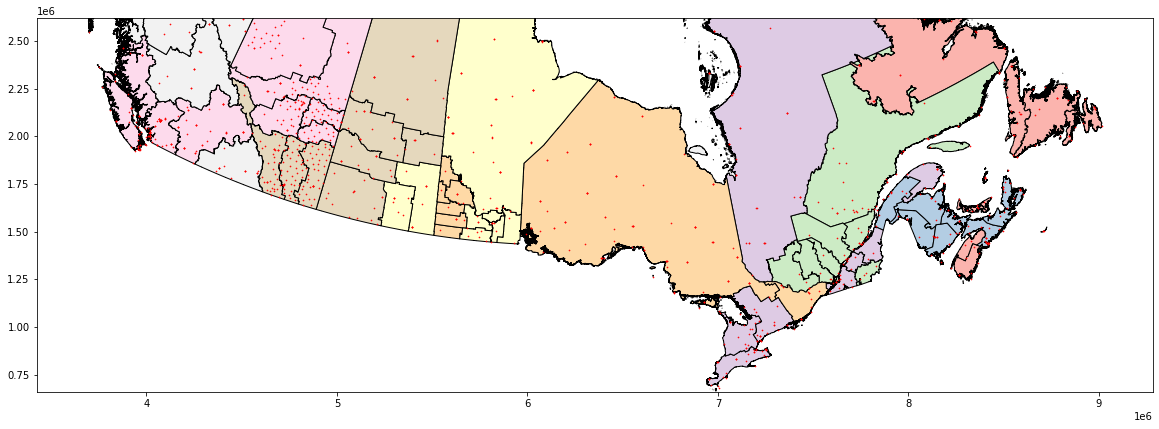

In [9]:
minx, miny, maxx, maxy = gdfRegions.total_bounds
# plot the both
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_ylim(miny, maxy/2.0)
gdfRegions.plot(ax=ax, cmap='Pastel1', edgecolor='black')
gdfStations.plot(ax=ax, color='red', markersize=0.4)
plt.show()

In [10]:
# gdfRegions.sort_values(by=['PRUID', 'CARUID'], inplace=True)


In [11]:
# gdfRegions

In [12]:
provinces = "GEOProvincialBoundaries.csv"
dfProvinces = pd.read_csv(provinces)
gdfProvinces = getGPDfromPD(dfProvinces, 'geometry')

In [13]:
gdfProvinces = gdfProvinces.set_crs("EPSG:3347", allow_override=True)

In [53]:
regions2 = "2006CensusAgRegions/gcar000b07a_e.dbf"
gdfRegions2 = gpd.read_file(regions2, encoding='utf-8')

<AxesSubplot:>

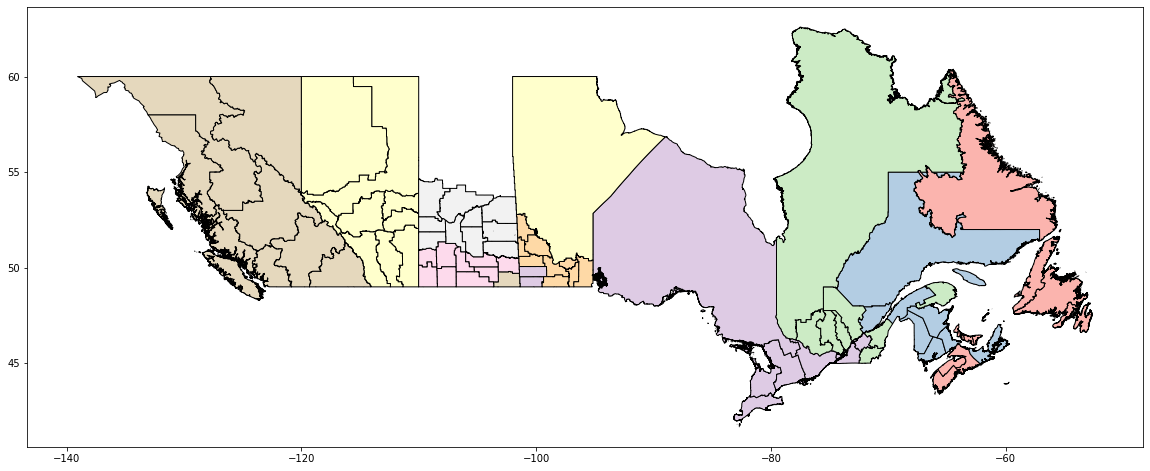

In [54]:
# plot regions2
fig, ax = plt.subplots(figsize=(20, 20))
# ax.set_ylim(miny, maxy/1.6)
# ax.set_xlim(minx, maxx/1.4)
gdfRegions2.plot(ax=ax, cmap='Pastel1', edgecolor='black')

In [ ]:
gdfRegions2

In [ ]:
# remove rows with nan
gdfPruned = gdfRegions2.copy(deep=True)

In [57]:
# keep ab mb sk
gdfPruned['PRuid'] = gdfPruned['PRuid'].astype(int)
gdfPruned = gdfPruned.loc[gdfPruned['PRuid'].isin([46,47,48])]


<AxesSubplot:>

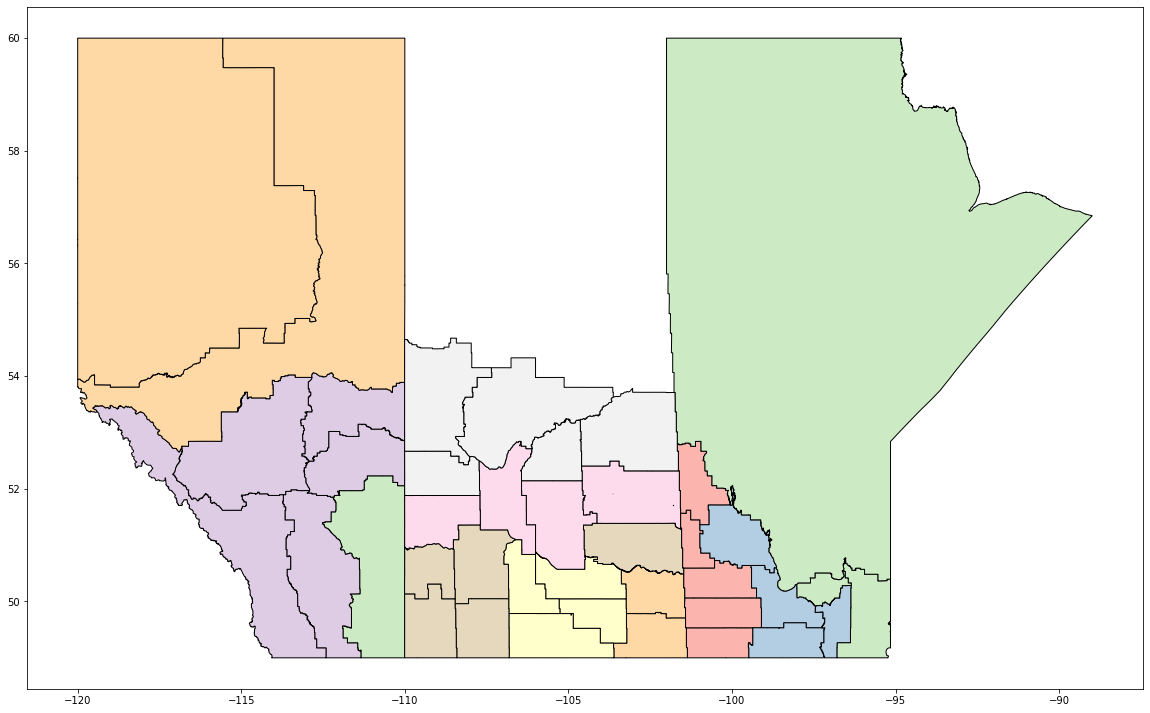

In [59]:
#plot
fig, ax = plt.subplots(figsize=(20, 20))
# ax.set_ylim(miny, maxy/1.6)
# ax.set_xlim(minx, maxx/1.4)
gdfPruned.plot(ax=ax, cmap='Pastel1', edgecolor='black')

In [71]:
gdfPruned.set_crs("EPSG:4326", allow_override=True)
gdfProjected = gdfPruned.to_crs("EPSG:3347")

<AxesSubplot:>

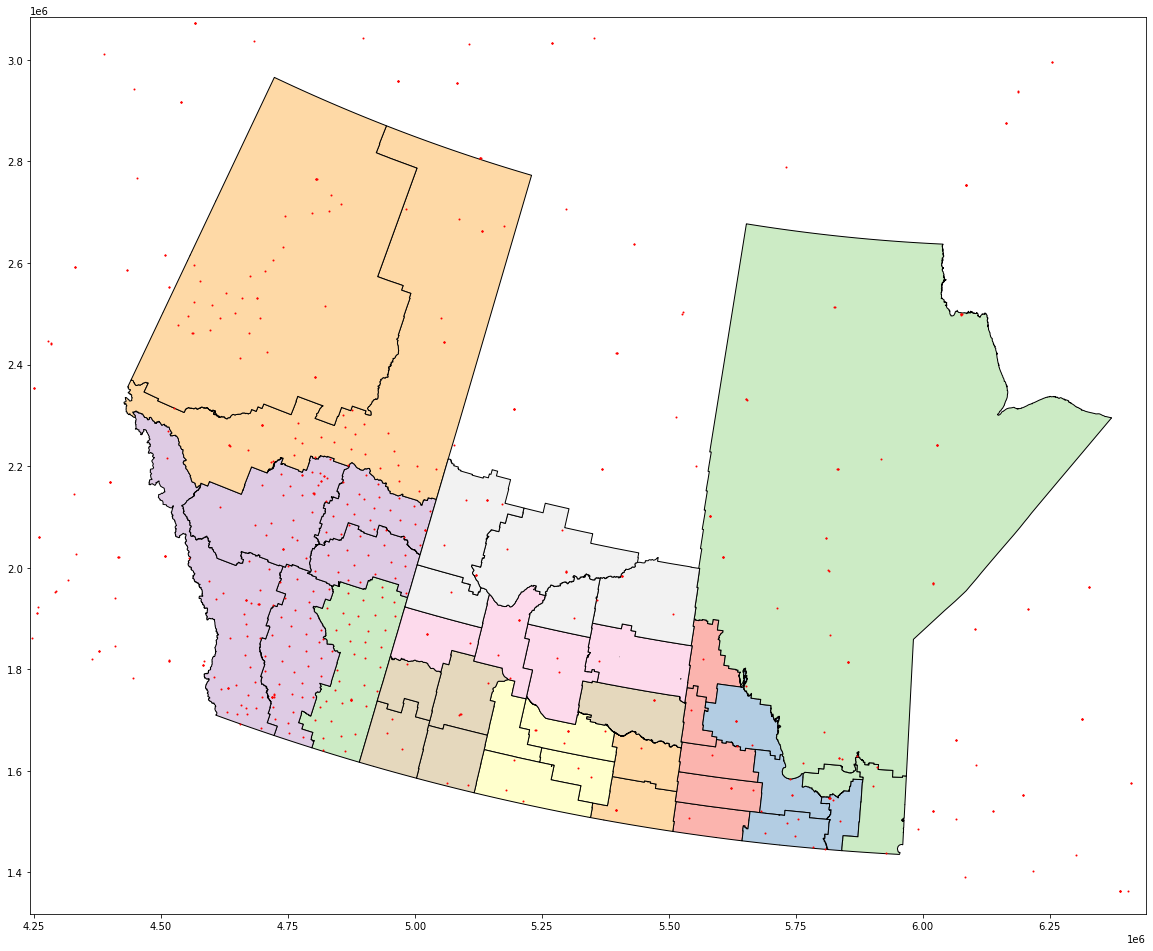

In [86]:
# plot stations vs projected regions
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_ylim(miny*2, maxy/1.7)
ax.set_xlim(minx*1.15, maxx/1.4)
gdfProjected.plot(ax=ax, cmap='Pastel1', edgecolor='black')
gdfStations.plot(ax=ax, color='red', markersize=1)

In [186]:
# reindex 
gdfProjected.reset_index(inplace=True)

ValueError: cannot insert level_0, already exists

In [99]:
# gray in rgba
gdfProjected['color'] = "#808080"

"#00FF00"
"#0000FF"

In [219]:
gdfProjected['CRnum'] = 0

In [220]:
# list of 11 colors complimentary in rgba
colors = ["#FF0000", "#FF7F00", "#FFFF00", "#00FF00", "#0000FF", "#4B0082", "#9400D3", "#FF00FF", "#FF0000", "#FF7F00", "#FFFF00"]

In [221]:
# set first row color red in rgba
gdfProjected.at[0, 'color'] = colors[0]

# set second row color 
gdfProjected.at[1, 'color'] = colors[0]

# set third row color 
gdfProjected.at[2, 'color'] = colors[0]
gdfProjected.at[7, 'color'] = colors[0]

gdfProjected.at[0, 'CRnum'] = 3
gdfProjected.at[1, 'CRnum'] = 3
gdfProjected.at[2, 'CRnum'] = 3
gdfProjected.at[7, 'CRnum'] = 3



In [222]:

gdfProjected.at[3, 'color'] = colors[1]
gdfProjected.at[4, 'color'] = colors[1]
gdfProjected.at[5, 'color'] = colors[1]

gdfProjected.at[3, 'CRnum'] = 2
gdfProjected.at[4, 'CRnum'] = 2
gdfProjected.at[5, 'CRnum'] = 2

In [223]:

gdfProjected.at[6, 'color'] = colors[2]
gdfProjected.at[8, 'color'] = colors[2]
gdfProjected.at[9, 'color'] = colors[2]
gdfProjected.at[10, 'color'] = colors[2]

gdfProjected.at[6, 'CRnum'] = 1
gdfProjected.at[8, 'CRnum'] = 1
gdfProjected.at[9, 'CRnum'] = 1
gdfProjected.at[10, 'CRnum'] = 1

In [224]:

gdfProjected.at[11, 'color'] = "#808080"

In [225]:

gdfProjected.at[12, 'color'] = colors[3]
gdfProjected.at[13, 'color'] = colors[3]
gdfProjected.at[14, 'color'] = colors[3]

gdfProjected.at[12, 'CRnum'] = 8
gdfProjected.at[13, 'CRnum'] = 8
gdfProjected.at[14, 'CRnum'] = 8

In [226]:

gdfProjected.at[15, 'color'] = colors[4]
gdfProjected.at[16, 'color'] = colors[4]
gdfProjected.at[17, 'color'] = colors[4]

gdfProjected.at[15, 'CRnum'] = 9
gdfProjected.at[16, 'CRnum'] = 9
gdfProjected.at[17, 'CRnum'] = 9

In [227]:

gdfProjected.at[18, 'color'] = "#808080"
gdfProjected.at[19, 'color'] = "#808080"

In [228]:

gdfProjected.at[20, 'color'] = colors[5]
gdfProjected.at[21, 'color'] = colors[5]
gdfProjected.at[22, 'color'] = colors[5]
gdfProjected.at[23, 'color'] = colors[5]
gdfProjected.at[25, 'color'] = colors[5]

gdfProjected.at[20, 'CRnum'] = 4
gdfProjected.at[21, 'CRnum'] = 4
gdfProjected.at[22, 'CRnum'] = 4
gdfProjected.at[23, 'CRnum'] = 4
gdfProjected.at[25, 'CRnum'] = 4

In [229]:

gdfProjected.at[24, 'color'] = colors[7]
gdfProjected.at[26, 'color'] = colors[7]
gdfProjected.at[27, 'color'] = colors[7]
gdfProjected.at[28, 'color'] = colors[7]
gdfProjected.at[29, 'color'] = colors[7]

gdfProjected.at[24, 'CRnum'] = 5
gdfProjected.at[26, 'CRnum'] = 5
gdfProjected.at[27, 'CRnum'] = 5
gdfProjected.at[28, 'CRnum'] = 5
gdfProjected.at[29, 'CRnum'] = 5

In [230]:

gdfProjected.at[30, 'color'] = colors[6]
gdfProjected.at[31, 'color'] = colors[6]
gdfProjected.at[32, 'color'] = colors[6]
gdfProjected.at[36, 'color'] = colors[6]
gdfProjected.at[37, 'color'] = colors[6]

gdfProjected.at[30, 'CRnum'] = 6
gdfProjected.at[31, 'CRnum'] = 6
gdfProjected.at[32, 'CRnum'] = 6
gdfProjected.at[36, 'CRnum'] = 6
gdfProjected.at[37, 'CRnum'] = 6

In [231]:

gdfProjected.at[33, 'color'] = colors[8]
gdfProjected.at[34, 'color'] = colors[8]
gdfProjected.at[35, 'color'] = colors[8]
gdfProjected.at[38, 'color'] = colors[8]
gdfProjected.at[39, 'color'] = colors[8]

gdfProjected.at[33, 'CRnum'] = 7
gdfProjected.at[34, 'CRnum'] = 7
gdfProjected.at[35, 'CRnum'] = 7
gdfProjected.at[38, 'CRnum'] = 7
gdfProjected.at[39, 'CRnum'] = 7

<AxesSubplot:>

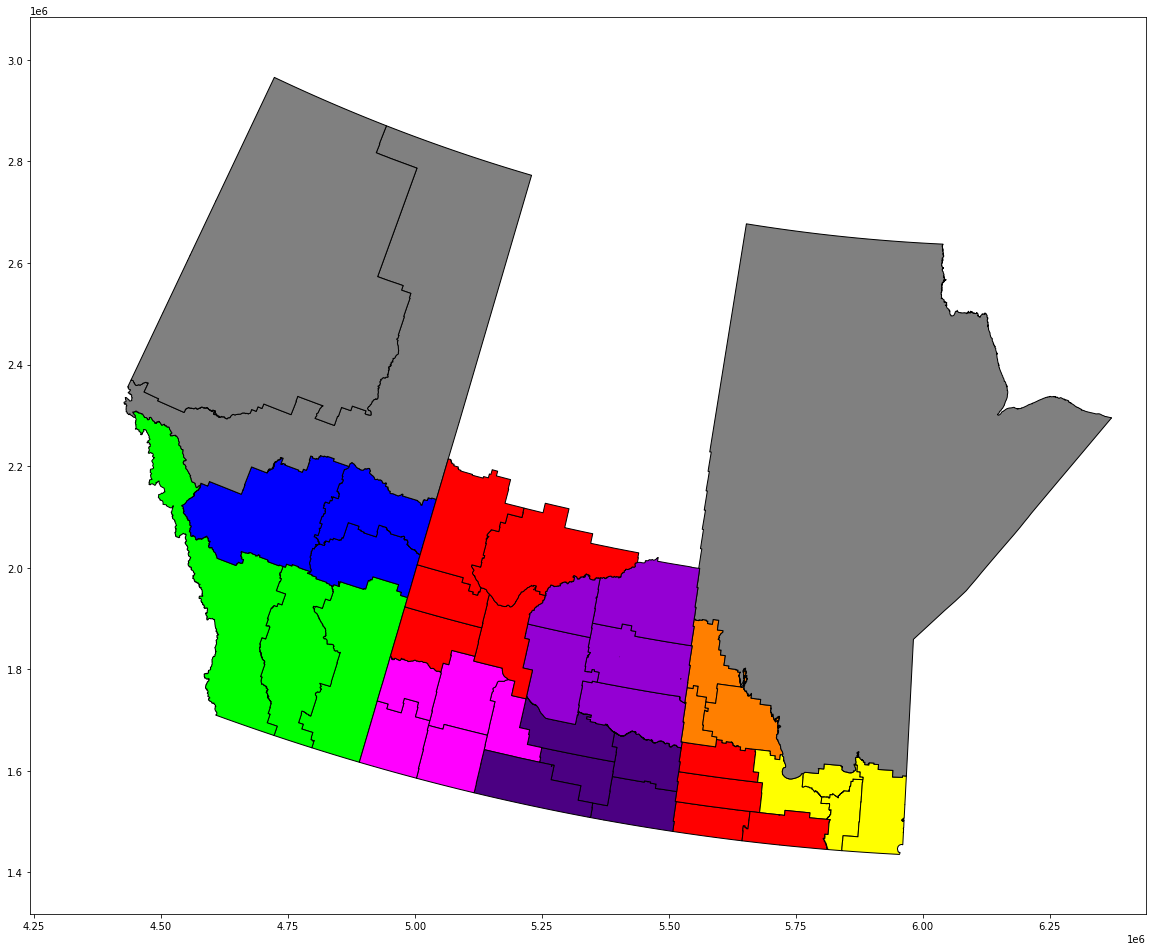

In [232]:
# plot using color column
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_ylim(miny*2, maxy/1.7)
ax.set_xlim(minx*1.15, maxx/1.4)
gdfProjected.plot(ax=ax, color=gdfProjected['color'], edgecolor='black')

In [234]:
# save projected to csv
gdfProjected.to_csv("RegionsProjected3347.csv")

In [235]:
gdfProjected

,level_0,index,CARuid,CARname,PRuid,AGuid,geometry,color,CRnum
0,0,34,4601,Census Agricultural Region 1,46.0,460100000,"POLYGON ((5614040.030 1525793.204, 5614049.916...",#FF0000,3
1,1,35,4602,Census Agricultural Region 2,46.0,460200000,"POLYGON ((5626194.299 1583517.983, 5626196.761...",#FF0000,3
2,2,36,4603,Census Agricultural Region 3,46.0,460300000,"POLYGON ((5604868.041 1657581.280, 5604597.366...",#FF0000,3
3,3,37,4604,Census Agricultural Region 4,46.0,460400000,"POLYGON ((5572893.654 1735557.501, 5572702.245...",#FF7F00,2
4,4,38,4605,Census Agricultural Region 5,46.0,460500000,"POLYGON ((5642129.777 1764975.307, 5640570.825...",#FF7F00,2
5,5,39,4606,Census Agricultural Region 6,46.0,460600000,"POLYGON ((5650771.936 1802331.590, 5650891.341...",#FF7F00,2
6,6,40,4607,Census Agricultural Region 7,46.0,460700000,"POLYGON ((5699696.737 1638839.856, 5699169.985...",#FFFF00,1
7,7,41,4608,Census Agricultural Region 8,46.0,460800000,"POLYGON ((5811211.812 1504579.905, 5813077.828...",#FF0000,3
8,8,42,4609,Census Agricultural Region 9,46.0,460900000,"POLYGON ((5881996.131 1582644.382, 5881995.457...",#FFFF00,1
9,9,43,4610,Census Agricultural Region 10,46.0,461000000,"MULTIPOLYGON (((5963272.940 1505971.912, 59632...",#FFFF00,1
